# Exploratory Data Analysis

## Importing Libraries and Data

In [1]:
# Importing necessary libraries
import re
import nltk
import json
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import gensim
import pyLDAvis.gensim
from collections import Counter

In [2]:
# Import local functions from a custom module
from general_functions import *

# AWS Credentials and S3 Bucket Connection
# Load AWS credentials from a JSON file
with open("aws_credentials.json", 'r') as file:
    aws_creds_json = json.load(file)

# Specify the S3 bucket name
bucket = "fs-reghub-news-analysis"

# Establish a connection to AWS and download the data files
aws = awsOps(aws_creds_json)
df = aws.get_df(bucket=bucket, file="data_rule_labels_v1.csv")
df_categories = aws.get_df(bucket=bucket, file="rule_labels_v1.csv")

## Data Overview

In [3]:
# Display basic information and statistics about the dataset
df

,Unnamed: 0,_id,_index,_score,_type,concepts,found_dates,id,internal_links,keywords,...,news_title,news_topic,news_type,references,sentiment_label,sentiment_score,source_country,source_name,source_type,rule_labels_comb
0,0,fin1023Preslofreshbuy917302,2021_reghub_new,NaN,_doc,NaN,[],fin1023Preslofreshbuy917302,[],NaN,...,HelloFresh Buy von Joh. Berenberg Gossler & Co...,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.at,Information Provider,['market']
1,1,finichtenStoceaaufbuy322htm,2021_reghub_new,NaN,_doc,NaN,[],finichtenStoceaaufbuy322htm,[],NaN,...,BERENBERG stuft Nordea auf 'Buy' Finanznachri...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,[],NaN,0.0,Global,finanznachrichten.de,Information Provider,['market']
2,2,fin1023Pressanofibuy917301,2021_reghub_new,NaN,_doc,NaN,[],fin1023Pressanofibuy917301,[],NaN,...,Sanofi Buy von Joh. Berenberg Gossler & Co. KG...,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.ch,Information Provider,['market']
3,3,fin02023Presnbergbank917304,2021_reghub_new,NaN,_doc,NaN,[],fin02023Presnbergbank917304,[],NaN,...,Sartorius vz Buy (Joh. Berenberg Gossler & Co....,"[{""description"":""Berenberg Bank"",""relevance"":4...",Press releases,[],NaN,0.0,Global,finanzen.net,Information Provider,[]
4,4,walOnlineStocgstuftsanofibuy,2021_reghub_new,NaN,_doc,NaN,[],walOnlineStocgstuftsanofibuy,[],NaN,...,BERENBERG stuft SANOFI auf 'Buy' 30.10.2023 ...,"[{""description"":""Berenberg Bank"",""relevance"":6...",Stock Analysis,[],NaN,0.0,Global,wallstreet-online.de,Information Provider,"['papers', 'market']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,14603,EurchosPres9fa0e44b60enhtml,2021_reghub_new,NaN,_doc,NaN,[],EurchosPres9fa0e44b60enhtml,[],NaN,...,Andrea Enria: Interview with Les Échos,"[{""description"":""Compliance"",""relevance"":7,""co...",Press releases,[],NaN,0.0,European Union (EU),European Central Bank (ECB),Central bank,"['legal', 'statements', 'guidelines']"
14497,14604,UBSWillPresllhtmlcaasIDRSS,2021_reghub_new,NaN,_doc,NaN,[],UBSWillPresllhtmlcaasIDRSS,[],NaN,...,Das FintechPortfolio von UBS investiert in die...,"[{""description"":""Digital Transformation"",""rele...",Press releases,[],NaN,0.0,Global,UBS Media Releases,Financial Service Provider,"['reports', 'personnel']"
14498,14605,invrankenPresnd26mrdfranken,2021_reghub_new,NaN,_doc,NaN,[],invrankenPresnd26mrdfranken,[],NaN,...,SNB erwartet für 2021 Jahresgewinn von rund 26...,"[{""description"":""Controlling"",""relevance"":33,""...",Press releases,[],NaN,0.0,Switzerland,investrends,Information provider,"['legal', 'reports', 'market']"
14499,14606,CoirawalsPrestomerswithdrawals,2021_reghub_new,NaN,_doc,NaN,[],CoirawalsPrestomerswithdrawals,[],NaN,...,Hong Kongbased Coinsuper allegedly blocks cust...,"[{""description"":""Daytrading"",""relevance"":49,""c...",Social Media,[],NaN,0.0,Global,Cointelegraph,Information provider,"['legal', 'reports', 'guidelines', 'press']"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14501 entries, 0 to 14500
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14501 non-null  int64  
 1   _id                14501 non-null  object 
 2   _index             14501 non-null  object 
 3   _score             11 non-null     object 
 4   _type              14491 non-null  object 
 5   concepts           2254 non-null   object 
 6   found_dates        13779 non-null  object 
 7   id                 14501 non-null  object 
 8   internal_links     13731 non-null  object 
 9   keywords           2360 non-null   object 
 10  language           14492 non-null  object 
 11  news_author        1979 non-null   object 
 12  news_content       14501 non-null  object 
 13  news_date          14490 non-null  object 
 14  news_label         238 non-null    object 
 15  news_last_updated  11 non-null     object 
 16  news_legalinforce  144

In [5]:
df.describe()

,Unnamed: 0,news_rank,sentiment_score
count,14501.000000,14490.000000,14488.000000
mean,7293.535480,1.602899,18316.606985
std,4213.730597,7.397628,185054.209279
min,0.000000,0.000000,-998439.000000
25%,3655.000000,0.000000,0.000000
50%,7294.000000,0.000000,0.000000
75%,10930.000000,0.000000,0.000000
max,14607.000000,160.000000,999864.000000


## Data Preprocessing

In [6]:
# Remove specific keywords from the 'concepts' column
keyword_to_remove = "market microstructure"
df = df[~df['concepts'].str.contains(keyword_to_remove, case=False, na=False)]

### Display Mislabeled Articles

In [7]:
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [8]:
def display_mislabeled_articles(df, text_column='news_content', title_column='news_title', lang_column='language', num_display=10):
    for index, row in df.iterrows():
        try:
            detected_lang = detect(row[text_column])
            if (row[lang_column] == 'de' and detected_lang == 'en') or (row[lang_column] == 'en' and detected_lang == 'de'):
                print(f"Mislabeled Article: {row[title_column]}")
                print(f"Detected Language: {detected_lang}, Labeled Language: {row[lang_column]}")
                print(f"Content: {row[text_column][:200]}...")  # Displaying first 200 characters
                print()
                num_display -= 1
                if num_display <= 0:
                    break
        except Exception as e:
            print(f"Error in detection: {e}")

### Display Number of Mislabeled Articles

In [9]:
def count_mislabeled_articles(df, text_column='news_content', lang_column='language'):
    mislabeled_en = 0
    mislabeled_de = 0

    for row in df.itertuples():
        try:
            detected_lang = detect(getattr(row, text_column))
            if getattr(row, lang_column) == 'de' and detected_lang == 'en':
                mislabeled_en += 1
            elif getattr(row, lang_column) == 'en' and detected_lang == 'de':
                mislabeled_de += 1
        except Exception as e:
            print(f"Error in detection: {e}")

    print(f"Number of English articles mislabeled as German: {mislabeled_en}")
    print(f"Number of German articles mislabeled as English: {mislabeled_de}")

### Correct Mislabeled Articles

In [10]:
def correct_mislabeled_articles(df, text_column='news_content', lang_column='language'):
    for index, row in df.iterrows():
        try:
            detected_lang = detect(row[text_column])
            if row[lang_column] == 'de' and detected_lang == 'en':
                df.at[index, lang_column] = 'en'
            elif row[lang_column] == 'en' and detected_lang == 'de':
                df.at[index, lang_column] = 'de'
        except Exception as e:
            print(f"Error in detection: {e}")
    return df

In [11]:
# Display some of the mislabeled articles
display_mislabeled_articles(df)

Mislabeled Article: Holger Schmieding Im Sommer könnte es richtig gut laufen für die deutsche Wirtschaft“
Detected Language: de, Labeled Language: en
Content: Der renommierte Volkswirt Holger Schmieding, der früher als Chefvolkswirt bei der US-Bank Merrill Lynch und der Bank of America tätig war, ist nun Chefvolkswirt bei der Berenberg Bank. In einem exklus...

Mislabeled Article: Philipp Hildebrand zur CS: «Es hätte nie so weit kommen dürfen»
Detected Language: en, Labeled Language: de
Content: In relation to Credit Suisse's emergency takeover, the name of former National Bank President Philipp Hildebrand and his employer, BlackRock, repeatedly appeared. Now, for the first time, Hildebrand h...

Mislabeled Article: Bewerbungsstart für Umweltpraktikum im MüritzNationalpark
Detected Language: en, Labeled Language: de
Content: The Commerzbank is offering an environmental internship in the Müritz National Park and interested students can apply from November 1st....

Mislabeled Article: Jo

In [12]:
# Display the number of mislabeled articles
count_mislabeled_articles(df)

Number of English articles mislabeled as German: 1585
Number of German articles mislabeled as English: 549


In [15]:
# Correct the language labels in the DataFrame
df = correct_mislabeled_articles(df)

In [16]:
# Display the number of mislabeled articles
count_mislabeled_articles(df)

Number of English articles mislabeled as German: 0
Number of German articles mislabeled as English: 0


## Length Analysis of News Content and Titles

### Calculation and statistical analysis

In [17]:
# Sample DataFrame loading (replace with your actual DataFrame loading)
# df = pd.read_csv('your_news_data.csv')

# Calculating the length of news content and titles in terms of characters
df.loc[:, 'content_length_chars'] = df['news_content'].str.len()
df.loc[:, 'title_length_chars'] = df['news_title'].str.len()

# Calculating the length of news content and titles in terms of words
df.loc[:, 'content_length_words'] = df['news_content'].str.split().str.len()
df.loc[:, 'title_length_words'] = df['news_title'].str.split().str.len()

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\716747912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'content_length_chars'] = df['news_content'].str.len()
C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\716747912.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'title_length_chars'] = df['news_title'].str.len()
C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\716747912.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [18]:
# Basic statistics for content and title lengths
content_char_stats = df['content_length_chars'].describe().round(1)
title_char_stats = df['title_length_chars'].describe().round(1)
content_word_stats = df['content_length_words'].describe().round(1)
title_word_stats = df['title_length_words'].describe().round(1)

print("Content Length (Characters): \n", content_char_stats)
print("\nTitle Length (Characters): \n", title_char_stats)
print("\nContent Length (Words): \n", content_word_stats)
print("\nTitle Length (Words): \n", title_word_stats)

Content Length (Characters): 
 count    14500.0
mean       664.0
std       2156.3
min          3.0
25%        144.0
50%        191.0
75%        518.0
max      32765.0
Name: content_length_chars, dtype: float64

Title Length (Characters): 
 count    14484.0
mean        75.8
std         24.1
min          7.0
25%         60.0
50%         74.0
75%         85.0
max        324.0
Name: title_length_chars, dtype: float64

Content Length (Words): 
 count    14500.0
mean        91.5
std        295.6
min          1.0
25%         21.0
50%         29.0
75%         79.0
max       5207.0
Name: content_length_words, dtype: float64

Title Length (Words): 
 count    14484.0
mean        10.4
std          4.0
min          1.0
25%          8.0
50%         10.0
75%         12.0
max         49.0
Name: title_length_words, dtype: float64


### Visual Analysis

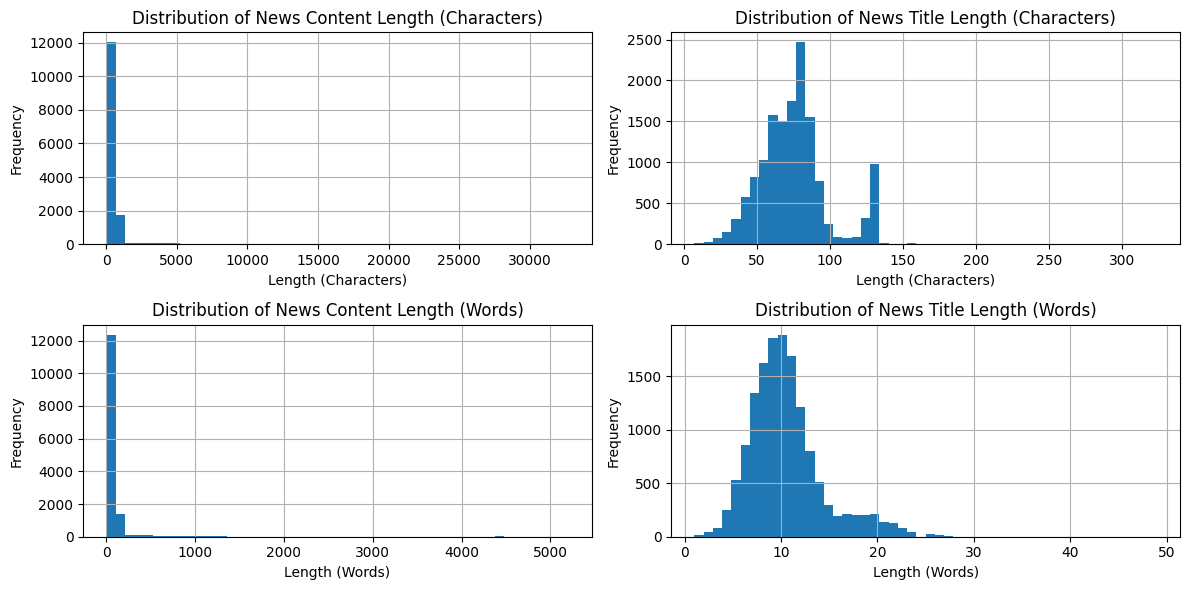

In [19]:
plt.figure(figsize=(12, 6))

# Distribution of News Content Length (Characters)
plt.subplot(2, 2, 1)
df['content_length_chars'].hist(bins=50)
plt.title('Distribution of News Content Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')

# Distribution of News Title Length (Characters)
plt.subplot(2, 2, 2)
df['title_length_chars'].hist(bins=50)
plt.title('Distribution of News Title Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')

# Distribution of News Content Length (Words)
plt.subplot(2, 2, 3)
df['content_length_words'].hist(bins=50)
plt.title('Distribution of News Content Length (Words)')
plt.xlabel('Length (Words)')
plt.ylabel('Frequency')

# Distribution of News Title Length (Words)
plt.subplot(2, 2, 4)
df['title_length_words'].hist(bins=50)
plt.title('Distribution of News Title Length (Words)')
plt.xlabel('Length (Words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

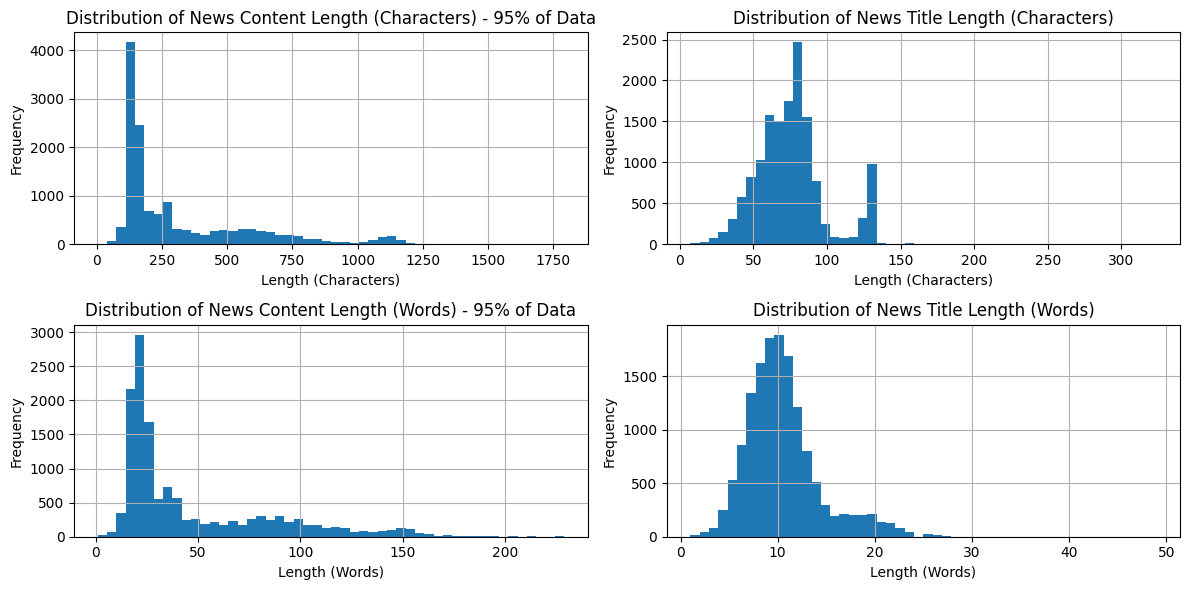

In [20]:
# Calculate the 95th percentile for content length in characters and words
char_95th_percentile = np.percentile(df['content_length_chars'], 95)
word_95th_percentile = np.percentile(df['content_length_words'], 95)

plt.figure(figsize=(12, 6))

# Distribution of News Content Length (Characters) - limited to 95th percentile
plt.subplot(2, 2, 1)
df[df['content_length_chars'] <= char_95th_percentile]['content_length_chars'].hist(bins=50)
plt.title('Distribution of News Content Length (Characters) - 95% of Data')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')

# Distribution of News Title Length (Characters)
plt.subplot(2, 2, 2)
df['title_length_chars'].hist(bins=50)
plt.title('Distribution of News Title Length (Characters)')
plt.xlabel('Length (Characters)')
plt.ylabel('Frequency')

# Distribution of News Content Length (Words) - limited to 95th percentile
plt.subplot(2, 2, 3)
df[df['content_length_words'] <= word_95th_percentile]['content_length_words'].hist(bins=50)
plt.title('Distribution of News Content Length (Words) - 95% of Data')
plt.xlabel('Length (Words)')
plt.ylabel('Frequency')

# Distribution of News Title Length (Words)
plt.subplot(2, 2, 4)
df['title_length_words'].hist(bins=50)
plt.title('Distribution of News Title Length (Words)')
plt.xlabel('Length (Words)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Frequency Analysis of News Title

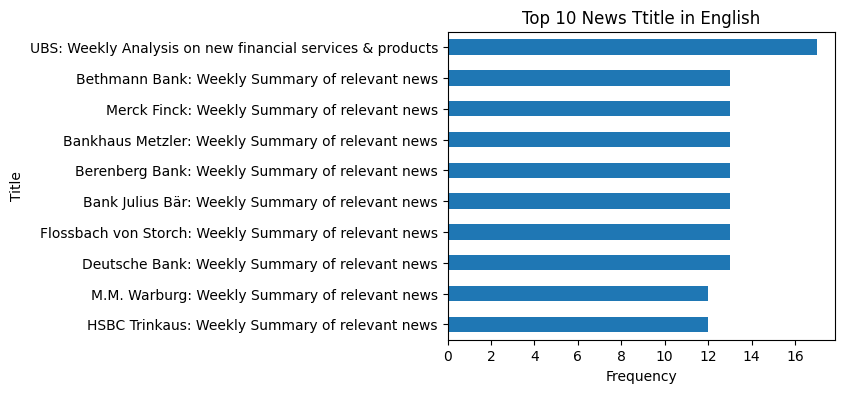

In [50]:
# Filter DataFrame for English articles and count news topics
category_counts_en = df[df['language'] == 'en']['news_title'].value_counts().sort_values(ascending=True).tail(10)

# Plotting frequency of news categories for English articles
plt.figure(figsize=(5, 4))
category_counts_en.plot(kind='barh')
plt.title('Top 10 News Ttitle in English')
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.show()

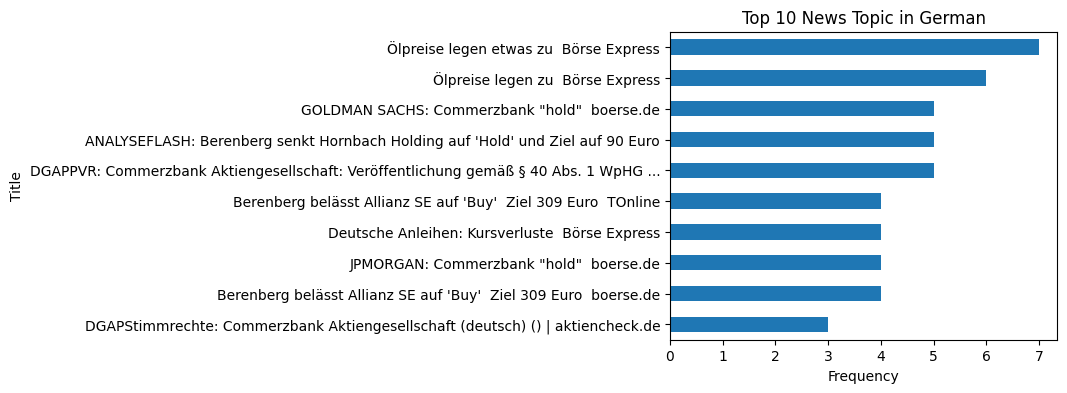

In [51]:
# Filter DataFrame for German articles and count news topics
category_counts_de = df[df['language'] == 'de']['news_title'].value_counts().sort_values(ascending=True).tail(10)

# Plotting frequency of news categories for German articles
plt.figure(figsize=(5, 4))
category_counts_de.plot(kind='barh')
plt.title('Top 10 News Topic in German')
plt.xlabel('Frequency')
plt.ylabel('Title')
plt.show()

## Frequency Analysis of News Types

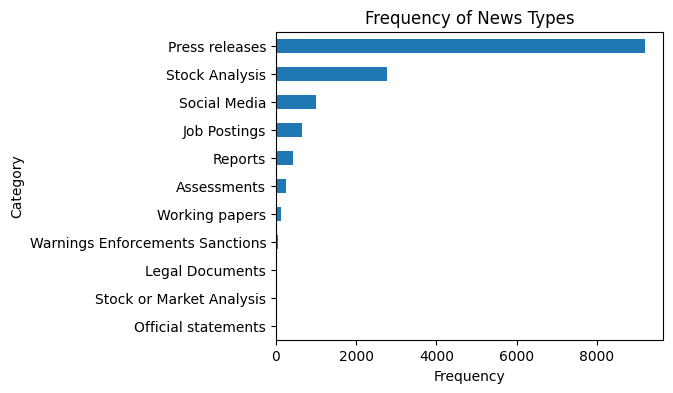

In [56]:
# Count and sort news categories
news_type_counts = df['news_type'].value_counts().sort_values(ascending=True)

# Plotting frequency of news categories
plt.figure(figsize=(5, 4))
news_type_counts.plot(kind='barh')
plt.title('Frequency of News Types')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

## Frequency Analysis of News Source Country

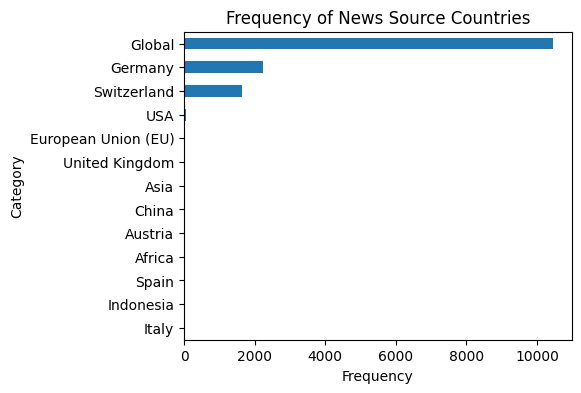

In [57]:
# Count and sort news source country
source_country_counts = df['source_country'].value_counts().sort_values(ascending=True)

# Plotting frequency of news categories
plt.figure(figsize=(5, 4))
source_country_counts.plot(kind='barh')
plt.title('Frequency of News Source Countries')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.show()

## Frequency Analysis of News Source Name

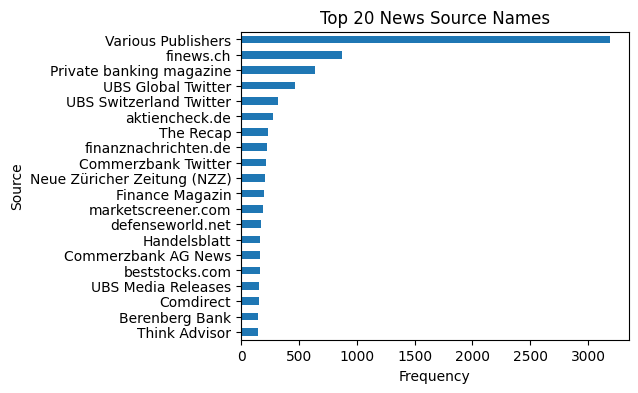

In [58]:
# Count and sort news sources
source_name_counts = df['source_name'].value_counts().sort_values(ascending=False)

# Display top 10 news sources
top_sources = source_name_counts.head(20).sort_values(ascending=True)

# Plotting top news sources
plt.figure(figsize=(5, 4))
top_sources.plot(kind='barh')
plt.title('Top 20 News Source Names')
plt.xlabel('Frequency')
plt.ylabel('Source')
plt.show()

In [59]:
# Count number of sources
num_unique_sources = df['source_name'].nunique()

print(f"Number of unique sources: {num_unique_sources}")

Number of unique sources: 1104


In [60]:
# Print top 20 sources for a quick overview
print(source_name_counts.head(20))

source_name
Various Publishers             3191
finews.ch                       875
Private banking magazine        640
UBS Global Twitter              470
UBS Switzerland Twitter         320
aktiencheck.de                  278
The Recap                       234
finanznachrichten.de            225
Commerzbank Twitter             216
Neue Züricher Zeitung (NZZ)     208
Finance Magazin                 196
marketscreener.com              194
defenseworld.net                169
Handelsblatt                    168
Commerzbank AG News             163
beststocks.com                  161
UBS Media Releases              158
Comdirect                       154
Berenberg Bank                  151
Think Advisor                   146
Name: count, dtype: int64


## Frequency Analysis of News Source Type

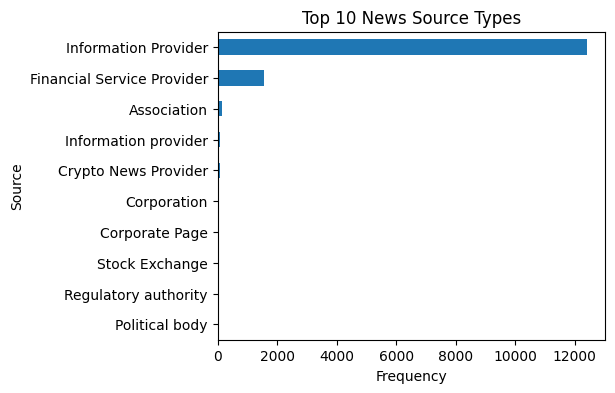

In [44]:
# Count and sort news sources
source_counts = df['source_type'].value_counts().sort_values(ascending=False)

# Display top 10 news sources
top_sources = source_counts.head(10).sort_values(ascending=True)

# Plotting top news sources
plt.figure(figsize=(5, 4))
top_sources.plot(kind='barh')
plt.title('Top 10 News Source Types')
plt.xlabel('Frequency')
plt.ylabel('Source')
plt.show()

## Sentiment Score Analysis

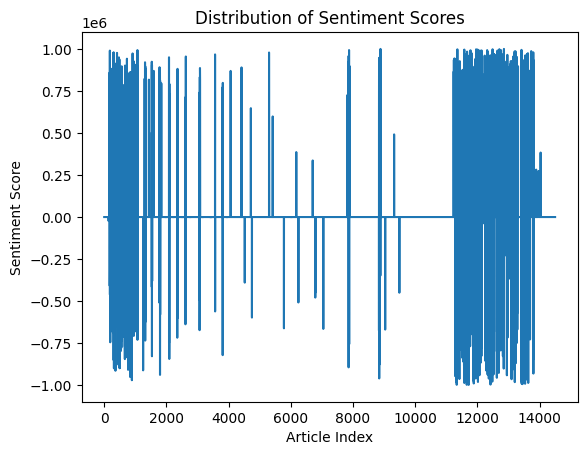

Sentiment score equals to zero in 13472 articles out of 14500 total articles.


In [26]:
# Plotting sentiment scores of news articles
df["sentiment_score"].plot(title='Distribution of Sentiment Scores')
plt.xlabel('Article Index')
plt.ylabel('Sentiment Score')
plt.show()

# Counting articles with zero sentiment score
zero_sentiment_count = (df['sentiment_score'] == 0).sum()
print(f"Sentiment score equals to zero in {zero_sentiment_count} articles out of {len(df)} total articles.")

## Language Analysis

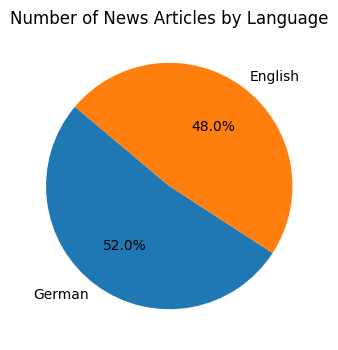

In [27]:
# Calculate the frequency of each language
language_counts = df['language'].value_counts()

# Filter to include only 'de' and 'en'
selected_languages = language_counts[language_counts.index.isin(['de', 'en'])]

# Rename the index for clearer labeling
selected_languages = selected_languages.rename(index={'de': 'German', 'en': 'English'})

# Create a pie chart for the selected languages
plt.figure(figsize=(5, 4))  # Adjust figure size as needed
plt.pie(selected_languages, labels=selected_languages.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Number of News Articles by Language', fontsize=12)
plt.show()


## Topic Analysis

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\49892062.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news_topic_formatted'] = df['news_topic'].apply(extract_description)


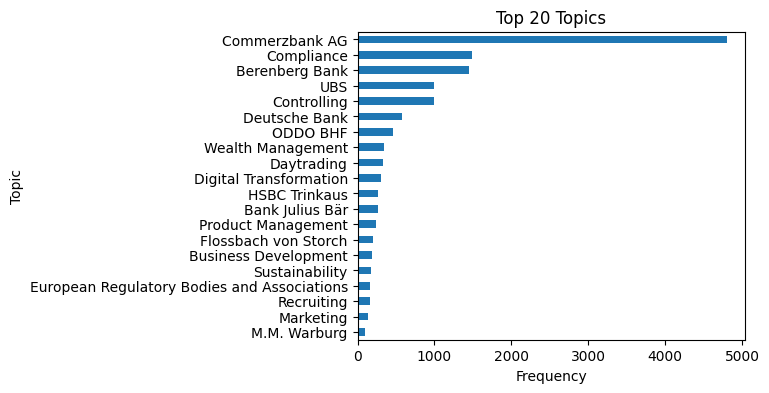

In [28]:
# Function to extract and format news topics
def extract_description(row):
    try:
        if isinstance(row, str):
            data = json.loads(row)
            return data[0]['description']
        else:
            return None
    except (json.JSONDecodeError, IndexError):
        return None

df['news_topic_formatted'] = df['news_topic'].apply(extract_description)

# Calculate the frequency of each topic
topic_counts = df['news_topic_formatted'].value_counts()

# Sort the series in descending order and select the top 20 topics
top_topics = topic_counts.sort_values(ascending=False).head(20)

# Sort these top 20 topics in ascending order for proper display in the horizontal bar chart
top_topics_sorted = top_topics.sort_values(ascending=True)

# Create a horizontal bar chart for the top 20 topics
plt.figure(figsize=(5, 4))  
top_topics_sorted.plot(kind='barh')  
plt.title('Top 20 Topics')
plt.ylabel('Topic') 
plt.xlabel('Frequency')  
plt.show()

In [61]:
# Count the number of unique topics
num_unique_topics = df['news_topic_formatted'].nunique()

print(f"Number of unique topics: {num_unique_topics}")

Number of unique topics: 60


In [29]:
# Print top 20 topics for a quick overview
print(topic_counts.head(20))

news_topic_formatted
Commerzbank AG                                 4799
Compliance                                     1488
Berenberg Bank                                 1450
UBS                                             998
Controlling                                     990
Deutsche Bank                                   581
ODDO BHF                                        461
Wealth Management                               344
Daytrading                                      326
Digital Transformation                          303
HSBC Trinkaus                                   271
Bank Julius Bär                                 262
Product Management                              237
Flossbach von Storch                            204
Business Development                            192
Sustainability                                  179
European Regulatory Bodies and Associations     166
Recruiting                                      156
Marketing                                  

### News Date Analysis

In [48]:
# Convert 'news_date' to datetime
df['news_date'] = pd.to_datetime(df['news_date'], format='%d.%m.%y %H:%M')

# Find the earliest and latest dates
earliest_date = df['news_date'].min()
latest_date = df['news_date'].max()

print(f"Date range of the dataset: {earliest_date} to {latest_date}")

Date range of the dataset: 2022-01-07 17:51:00 to 2023-10-30 13:00:00


C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\206804300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news_date'] = pd.to_datetime(df['news_date'], format='%d.%m.%y %H:%M')


## Common Words & Phrases Analysis

### Analysis Setup

In [30]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define stopwords for English and German languages
stop_en = set(stopwords.words('english'))
stop_de = set(stopwords.words('german'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xiang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# Filter the DataFrame for English and German content
df_en = df[df['language'] == 'en']
df_de = df[df['language'] == 'de']

In [32]:
def process_and_plot_ngrams(df, stop_words, language, n=2):
    # Function to preprocess text and generate n-grams
    def generate_ngrams(text):
        # Remove HTML tags using Beautiful Soup
        soup = BeautifulSoup(text, "html.parser")
        cleaned_text = soup.get_text()

        # Convert to lowercase, remove punctuation and numbers
        cleaned_text = cleaned_text.lower()
        cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation + string.digits))
        
        # Tokenize
        words = word_tokenize(cleaned_text)
        
        # Remove stopwords and short words
        words = [word for word in words if word not in stop_words and len(word) > 1]
        
        # Generate n-grams
        return list(ngrams(words, n))

    # Flatten the list of n-grams in 'news_content'
    all_ngrams = [ngram for text in df['news_content'].dropna().apply(generate_ngrams) for ngram in text]

    # Count n-gram occurrences
    counter = Counter(all_ngrams)

    # Identify the most common n-grams
    most_common = counter.most_common(20)

    # Plotting
    sns.barplot(x=[count for ngram, count in most_common], y=[' '.join(ngram) for ngram, count in most_common])
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.title(f'Most Common {n}-grams in {language} News Content')
    plt.show()

### Display Common Words and Phrases for English Content

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1388730373.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


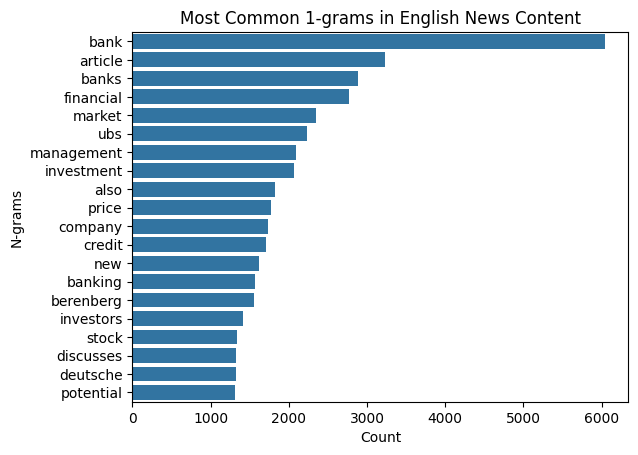

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1388730373.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


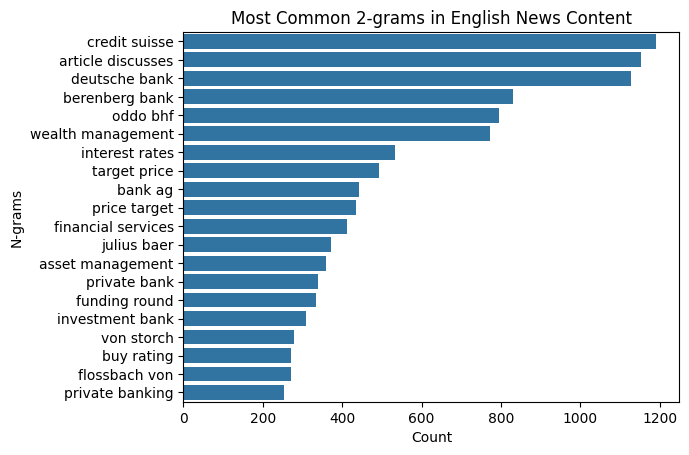

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1388730373.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


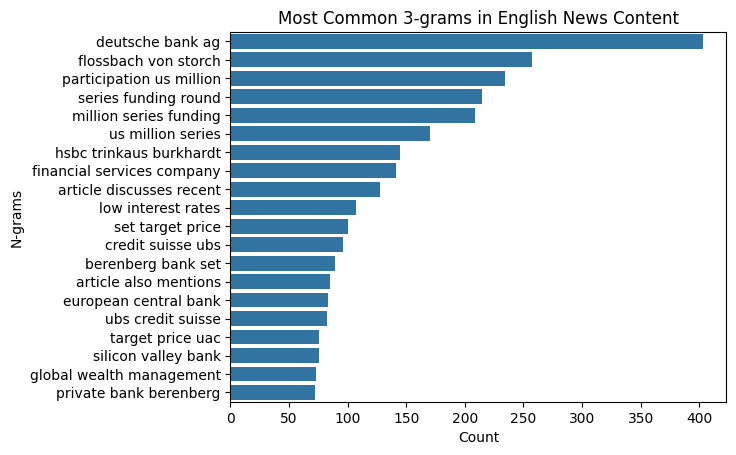

In [33]:
process_and_plot_ngrams(df_en, stop_en, 'English', n=1)  # For single words
process_and_plot_ngrams(df_en, stop_en, 'English', n=2)  # For bigrams
process_and_plot_ngrams(df_en, stop_en, 'English', n=3)  # For trigrams

In [62]:
def get_top_ngrams(df, stop_words, language, n=2, top_n=20):
    # Reusing the generate_ngrams function from the existing code
    def generate_ngrams(text):
        soup = BeautifulSoup(text, "html.parser")
        cleaned_text = soup.get_text()
        cleaned_text = cleaned_text.lower()
        cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation + string.digits))
        words = word_tokenize(cleaned_text)
        words = [word for word in words if word not in stop_words and len(word) > 1]
        return list(ngrams(words, n))

    all_ngrams = [ngram for text in df['news_content'].dropna().apply(generate_ngrams) for ngram in text]
    counter = Counter(all_ngrams)

    return counter.most_common(top_n)

# get the top 20 bigrams in English
top_bigrams_en = get_top_ngrams(df_en, stop_en, 'English', n=2, top_n=20)

# Printing the top bigrams and their counts
print("Top 20 bigrams in English news content:")
for bigram, count in top_bigrams_en:
    print(f"{' '.join(bigram)}: {count}")

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\2592528116.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Top 20 bigrams in English news content:
credit suisse: 1190
article discusses: 1153
deutsche bank: 1128
berenberg bank: 831
oddo bhf: 796
wealth management: 772
interest rates: 533
target price: 493
bank ag: 442
price target: 435
financial services: 413
julius baer: 371
asset management: 360
private bank: 339
funding round: 333
investment bank: 310
von storch: 279
buy rating: 272
flossbach von: 271
private banking: 254


### Display Common Words and Phrases for German Content

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1388730373.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


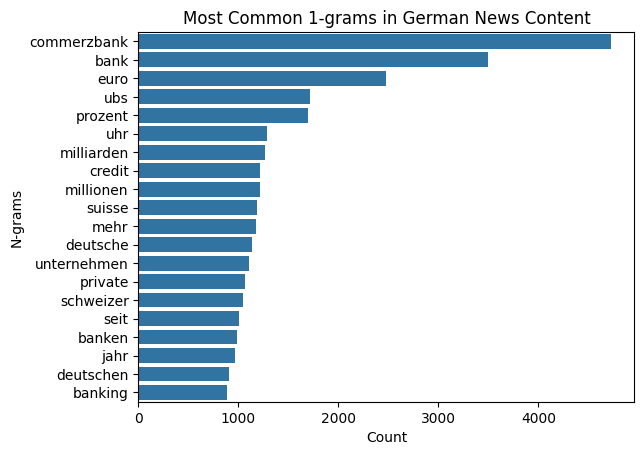

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1388730373.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


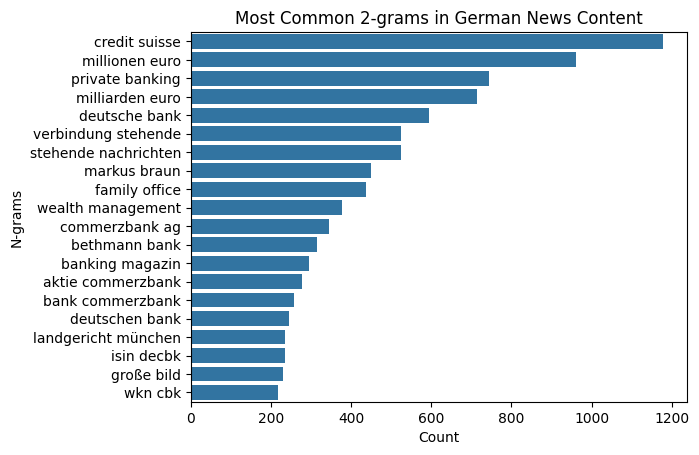

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1388730373.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


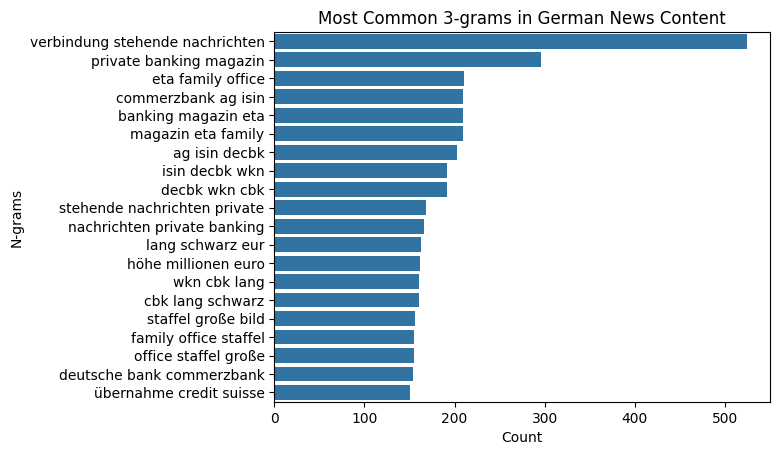

In [34]:
process_and_plot_ngrams(df_de, stop_de, 'German', n=1)  # For single words
process_and_plot_ngrams(df_de, stop_de, 'German', n=2)  # For bigrams
process_and_plot_ngrams(df_de, stop_de, 'German', n=3)  # For trigrams

In [63]:
def get_top_ngrams(df, stop_words, language, n=2, top_n=20):
    # Reusing the generate_ngrams function
    def generate_ngrams(text):
        soup = BeautifulSoup(text, "html.parser")
        cleaned_text = soup.get_text()
        cleaned_text = cleaned_text.lower()
        cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation + string.digits))
        words = word_tokenize(cleaned_text)
        words = [word for word in words if word not in stop_words and len(word) > 1]
        return list(ngrams(words, n))

    all_ngrams = [ngram for text in df['news_content'].dropna().apply(generate_ngrams) for ngram in text]
    counter = Counter(all_ngrams)

    return counter.most_common(top_n)

# get the top 20 bigrams in German
top_bigrams_de = get_top_ngrams(df_de, stop_de, 'German', n=2, top_n=20)

# Printing the top bigrams and their counts
print("Top 20 bigrams in German news content:")
for bigram, count in top_bigrams_de:
    print(f"{' '.join(bigram)}: {count}")

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\2309799104.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Top 20 bigrams in German news content:
credit suisse: 1178
millionen euro: 961
private banking: 744
milliarden euro: 713
deutsche bank: 594
verbindung stehende: 524
stehende nachrichten: 524
markus braun: 450
family office: 437
wealth management: 378
commerzbank ag: 345
bethmann bank: 314
banking magazin: 296
aktie commerzbank: 278
bank commerzbank: 257
deutschen bank: 246
landgericht münchen: 236
isin decbk: 235
große bild: 231
wkn cbk: 217


## LDA: Topic Modeling & Key Words

### Analysis Setup

In [35]:
def get_ngrams(words, n):
    return [' '.join(ngram) for ngram in ngrams(words, n)]

def get_lda_objects(text, language='english'):
    stop_words = stop_en if language == 'english' else stop_de

    def _preprocess_text(text_data):
        def preprocess_entry(entry):
            soup = BeautifulSoup(entry, "html.parser")
            cleaned_text = soup.get_text()
            cleaned_text = cleaned_text.lower()
            cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation + string.digits))
            
            words = word_tokenize(cleaned_text)
            words = [word for word in words if word not in stop_words and len(word) > 2]

            # Generate unigrams, bigrams, and trigrams
            all_ngrams = words + get_ngrams(words, 2) + get_ngrams(words, 3)
            return all_ngrams

        return [preprocess_entry(news) for news in text_data if pd.notna(news)]

    corpus = _preprocess_text(text)
    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=dic, passes=10, workers=2)
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

### Running LDA Analysis

In [36]:
# Run LDA for English titles
title_en = df_en['news_title'].tolist()
lda_model_en, bow_corpus_en, dic_en = get_lda_objects(title_en, language='english')
vis_en_titles = plot_lda_vis(lda_model_en, bow_corpus_en, dic_en)

# Run LDA for German titles
title_de = df_de['news_title'].tolist()
lda_model_de, bow_corpus_de, dic_de = get_lda_objects(title_de, language='german')
vis_de_titles = plot_lda_vis(lda_model_de, bow_corpus_de, dic_de)

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1168226110.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(entry, "html.parser")
C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1168226110.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(entry, "html.parser")


In [37]:
# Run LDA for English content
content_en = df_en['news_content'].tolist()
lda_model_en_content, bow_corpus_en_content, dic_en_content = get_lda_objects(content_en, language='english')
vis_en_content = plot_lda_vis(lda_model_en_content, bow_corpus_en_content, dic_en_content)

# Run LDA for German content
content_de = df_de['news_content'].tolist()
lda_model_de_content, bow_corpus_de_content, dic_de_content = get_lda_objects(content_de, language='german')
vis_de_content = plot_lda_vis(lda_model_de_content, bow_corpus_de_content, dic_de_content)

C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1168226110.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(entry, "html.parser")
C:\Users\xiang\AppData\Local\Temp\ipykernel_34172\1168226110.py:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(entry, "html.parser")


### Display LDA Analysis

In [38]:
# Display LDA visualizations for English titles
vis_en_titles

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.098771  0.107734       1        1  20.361739
3     -0.108894 -0.105844       2        1  19.037456
0      0.072180  0.004572       3        1  16.228140
5      0.049891 -0.069024       4        1  15.816703
1      0.030286  0.049207       5        1  14.757171
2      0.055309  0.013355       6        1  13.798790, topic_info=                Term        Freq       Total Category  logprob  loglift
2345         summary   85.000000   85.000000  Default  30.0000  30.0000
2349  weekly summary   85.000000   85.000000  Default  29.0000  29.0000
505         oddo bhf  226.000000  226.000000  Default  28.0000  28.0000
486              bhf  229.000000  229.000000  Default  27.0000  27.0000
504             oddo  230.000000  230.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
498           market   14.987467  117.087935   Topic6  -7.2676  -0.0751
1592      management   14.701302  107.237723   Topic6  -7.2869  -0.0065
0               bank   19.420903  603.699550   Topic6  -7.0085  -1.4561
1          berenberg   18.647844  477.906457   Topic6  -7.0491  -1.2631
20               auf   14.658177  174.468886   Topic6  -7.2898  -0.4962

[424 rows x 6 columns], token_table=       Topic      Freq                       Term
term                                             
3064       3  0.835799          according article
3065       3  0.835798  according article section
11027      2  0.932043                    adjusts
11027      5  0.040524                    adjusts
40859      1  0.982434             aktie erwartet
...      ...       ...                        ...
3850       3  0.105271                  ziel euro
3850       5  0.666716                  ziel euro
3980       3  0.227510                   ziel für
3980       4  0.682529                   ziel für
3980       5  0.045502                   ziel für

[715 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 6, 2, 3])

In [39]:
# Display LDA visualizations for German titles
vis_de_titles

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.091191  0.123839       1        1  18.098718
3     -0.069554 -0.094970       2        1  17.422604
2      0.059650  0.018475       3        1  17.237073
1      0.065717  0.009217       4        1  16.437069
4     -0.047232 -0.058935       5        1  16.276247
0      0.082610  0.002374       6        1  14.528289, topic_info=                   Term        Freq       Total Category  logprob  loglift
105                news  179.000000  179.000000  Default  30.0000  30.0000
93              arivade  106.000000  106.000000  Default  29.0000  29.0000
106        news arivade  106.000000  106.000000  Default  28.0000  28.0000
208                bank  384.000000  384.000000  Default  27.0000  27.0000
970       deutsche bank  219.000000  219.000000  Default  26.0000  26.0000
...                 ...         ...         ...      ...      ...      ...
1529          ziel euro   13.464617   35.893392   Topic6  -7.2274   0.9486
567   commerzbank aktie   16.463672  144.280037   Topic6  -7.0263  -0.2415
205             prozent   15.181032   81.669317   Topic6  -7.1074   0.2464
507           frankfurt   14.390669   64.287185   Topic6  -7.1609   0.4323
24    finanznachrichten   14.182638  114.564586   Topic6  -7.1754  -0.1600

[439 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
5802       2  0.978759                   abs
5803       2  0.978757              abs wphg
5804       2  0.967108         abs wphg ziel
25475      5  0.984042             according
25476      5  0.984044     according article
...      ...       ...                   ...
12186      1  0.604999        ölpreise legen
12186      2  0.302500        ölpreise legen
12186      3  0.043214        ölpreise legen
26610      1  0.980564  ölpreise legen börse
24984      2  0.861889            übertrifft

[772 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 2, 5, 1])

In [40]:
# Display LDA visualizations for English content
vis_en_content

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.085567  0.097156       1        1  19.381770
5     -0.017046 -0.032136       2        1  18.342461
4      0.032219 -0.011963       3        1  16.927045
2      0.123097  0.046172       4        1  15.944913
3     -0.028407 -0.013767       5        1  14.804377
0     -0.024295 -0.085462       6        1  14.599434, topic_info=                 Term         Freq        Total Category  logprob  loglift
9           berenberg  1101.000000  1101.000000  Default  30.0000  30.0000
307             price  1229.000000  1229.000000  Default  29.0000  29.0000
10     berenberg bank   625.000000   625.000000  Default  28.0000  28.0000
32252   funding round   302.000000   302.000000  Default  27.0000  27.0000
947            target   749.000000   749.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1616         interest    88.005650   667.261972   Topic6  -7.5873  -0.1016
1303       management   103.546075  1362.461252   Topic6  -7.4247  -0.6528
524         discusses    87.512413   696.276452   Topic6  -7.5929  -0.1498
435            credit    91.129823  1140.951801   Topic6  -7.5524  -0.6031
27              stock    88.162014   804.347818   Topic6  -7.5855  -0.2867

[492 rows x 6 columns], token_table=        Topic      Freq         Term
term                                
410384      1  0.970102  action plan
1897        1  0.324159         aims
1897        2  0.150024         aims
1897        3  0.179493         aims
1897        4  0.101802         aims
...       ...       ...          ...
8260        2  0.173898        years
8260        3  0.121729        years
8260        4  0.126697        years
8260        5  0.193773        years
8260        6  0.208678        years

[1051 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 3, 4, 1])

In [41]:
# Display LDA visualizations for German content
vis_de_content

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.219594 -0.010594       1        1  26.543864
4     -0.050353 -0.042133       2        1  18.740762
5     -0.031039  0.169971       3        1  18.732020
0     -0.049434 -0.046640       4        1  12.444098
2     -0.041914 -0.026944       5        1  12.143978
3     -0.046854 -0.043660       6        1  11.395277, topic_info=               Term         Freq        Total Category  logprob  loglift
15516           eur   415.000000   415.000000  Default  30.0000  30.0000
93001         braun   597.000000   597.000000  Default  29.0000  29.0000
266     commerzbank  3370.000000  3370.000000  Default  28.0000  28.0000
24092      wirecard   573.000000   573.000000  Default  27.0000  27.0000
95076  markus braun   331.000000   331.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
19697          bild    55.773722   283.764768   Topic6  -7.6282   0.5451
1184           jahr    69.933549   699.549846   Topic6  -7.4020  -0.1309
573     unternehmen    70.994137   785.719923   Topic6  -7.3869  -0.2320
921            euro    72.779666  1839.008655   Topic6  -7.3621  -1.0576
1404      deutschen    57.870702   657.319844   Topic6  -7.5913  -0.2580

[471 rows x 6 columns], token_table=        Topic      Freq                     Term
term                                            
327082      4  0.078559           abgang hamburg
327082      5  0.157117           abgang hamburg
327082      6  0.746306           abgang hamburg
3040        1  0.024470                      abn
3040        2  0.868683                      abn
...       ...       ...                      ...
2479        2  0.112335  übernahme credit suisse
2479        3  0.741409  übernahme credit suisse
2479        4  0.044934  übernahme credit suisse
2479        5  0.067401  übernahme credit suisse
2479        6  0.033700  übernahme credit suisse

[1024 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 6, 1, 3, 4])